<a href="https://colab.research.google.com/github/WaleedSharkas/hackerfile/blob/master/Project_4_Group.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clean And Analyze Employee Exit Surveys

This  project will look at survey data from the Department of Education, Training and Employment [DETE](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey) and the Technical and Further Education [TAFE](https://data.gov.au/dataset/ds-qld-89970a3b-182b-41ea-aea2-6f9f17b5907e/details?q=exit%20survey) body of the Queensland government in Australia.

We will combine the results from both suverys to answer a certain question:


*   Are employees who only worked for the institutes for a short period 
of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?

In [ ]:
import pandas as pd
import numpy as np
dete_survey = pd.read_csv('dete_survey.csv')
tafe_survey = pd.read_csv("tafe_survey.csv")


pd.options.display.max_columns = 150
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,Career move to public sector,Career move to private sector,Interpersonal conflicts,Job dissatisfaction,Dissatisfaction with the department,Physical work environment,Lack of recognition,Lack of job security,Work location,Employment conditions,Maternity/family,Relocation,Study/Travel,Ill Health,Traumatic incident,Work life balance,Workload,None of the above,Professional Development,Opportunities for promotion,Staff morale,Workplace issue,Physical environment,Worklife balance,Stress and pressure support,Performance of supervisor,Peer support,Initiative,Skills,Coach,Career Aspirations,Feedback,Further PD,Communication,My say,Information,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,A,A,N,N,N,A,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,A,N,N,N,N,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,A,A,N,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,N,N,N,A,A,N,N,A,A,A,A,A,A,A,A,A,A,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,A,A,N,N,D,D,N,A,A,A,A,A,A,SA,SA,D,D,A,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [ ]:
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             822 non-null object
DETE Start Date                        822 non-null object
Role Start Date                        822 non-null object
Position                               817 non-null object
Classification                         455 non-null object
Region                                 822 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work environ

In [ ]:
dete_survey.shape

(822, 56)

In [ ]:
tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Main Factor. Which of these was the main factor for leaving?,InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction,InstituteViews. Topic:2. I was given access to skills training to help me do my job better,InstituteViews. Topic:3. I was given adequate opportunities for personal development,InstituteViews. Topic:4. I was given adequate opportunities for promotion within %Institute]Q25LBL%,InstituteViews. Topic:5. I felt the salary for the job was right for the responsibilities I had,InstituteViews. Topic:6. The organisation recognised when staff did good work,InstituteViews. Topic:7. Management was generally supportive of me,InstituteViews. Topic:8. Management was generally supportive of my team,InstituteViews. Topic:9. I was kept informed of the changes in the organisation which would affect me,InstituteViews. Topic:10. Staff morale was positive within the Institute,InstituteViews. Topic:11. If I had a workplace issue it was dealt with quickly,InstituteViews. Topic:12. If I had a workplace issue it was dealt with efficiently,InstituteViews. Topic:13. If I had a workplace issue it was dealt with discreetly,WorkUnitViews. Topic:14. I was satisfied with the quality of the management and supervision within my work unit,WorkUnitViews. Topic:15. I worked well with my colleagues,WorkUnitViews. Topic:16. My job was challenging and interesting,WorkUnitViews. Topic:17. I was encouraged to use my initiative in the course of my work,WorkUnitViews. Topic:18. I had sufficient contact with other people in my job,WorkUnitViews. Topic:19. I was given adequate support and co-operation by my peers to enable me to do my job,WorkUnitViews. Topic:20. I was able to use the full range of my skills in my job,WorkUnitViews. Topic:21. I was able to use the full range of my abilities in my job. ; Category:Level of Agreement; Question:YOUR VIEWS ABOUT YOUR WORK UNIT],WorkUnitViews. Topic:22. I was able to use the full range of my knowledge in my job,WorkUnitViews. Topic:23. My job provided sufficient variety,WorkUnitViews. Topic:24. I was able to cope with the level of stress and pressure in my job,WorkUnitViews. Topic:25. My job allowed me to balance the demands of work and family to my satisfaction,WorkUnitViews. Topic:26. My supervisor gave me adequate personal recognition and feedback on my performance,"WorkUnitViews. Topic:27. My working environment was satisfactory e.g. sufficient space, good lighting, suitable seating and working area",WorkUnitViews. Topic:28. I was given the opportunity to mentor and coach others in order for me to pass on my skills and knowledge prior to my cessation date,WorkUnitViews. Topic:29. There was adequate communication between staff in my unit,WorkUnitViews. Topic:30. Staff morale was positive within my work unit,Induction. Did you undertake Workplace Induction?,InductionInfo. Topic:Did you undertake a Corporate Induction?,InductionInfo. Topic:Did you undertake a Institute Induction?,InductionInfo. Topic: Did you undertake Team Induction?,InductionInfo. Face to Face Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. On-line Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. Induction Manual Topic:Did you undertake a Corporate Induction?,InductionInfo. Face to Face Topic:Did you undertake a Institute Induction?,InductionInfo. On-line Topic:Did you undertake a Institute Induction?

In [ ]:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
Record ID                                                                                                                                                        702 non-null float64
Institute                                                                                                                                                        702 non-null object
WorkArea                                                                                                                                                         702 non-null object
CESSATION YEAR                                                                                                                                                   695 non-null float64
Reason for ceasing employment                                                                                                                                    701 non-

# Identify Missing Values and Drop Unneccessary Columns

It seems there is alot of missing information in DETE, this should be analyzed further to see if there is anything alarming. 

In [ ]:
# Read in  `Not Stated` values as `NaN`
dete_survey = pd.read_csv('dete_survey.csv', na_values='Not Stated')

dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,Career move to public sector,Career move to private sector,Interpersonal conflicts,Job dissatisfaction,Dissatisfaction with the department,Physical work environment,Lack of recognition,Lack of job security,Work location,Employment conditions,Maternity/family,Relocation,Study/Travel,Ill Health,Traumatic incident,Work life balance,Workload,None of the above,Professional Development,Opportunities for promotion,Staff morale,Workplace issue,Physical environment,Worklife balance,Stress and pressure support,Performance of supervisor,Peer support,Initiative,Skills,Coach,Career Aspirations,Feedback,Further PD,Communication,My say,Information,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,A,A,N,N,N,A,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,A,N,N,N,N,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,A,A,N,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,N,N,N,A,A,N,N,A,A,A,A,A,A,A,A,A,A,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,A,A,N,N,D,D,N,A,A,A,A,A,A,SA,SA,D,D,A,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [ ]:
dete_survey.shape

(822, 56)

In [ ]:
# Remove columns we don't need for analysis
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1)
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)

#Check columns
print(dete_survey_updated.columns)
print(tafe_survey_updated.columns)

Index(['ID', 'SeparationType', 'Cease Date', 'DETE Start Date',
       'Role Start Date', 'Position', 'Classification', 'Region',
       'Business Unit', 'Employment Status', 'Career move to public sector',
       'Career move to private sector', 'Interpersonal conflicts',
       'Job dissatisfaction', 'Dissatisfaction with the department',
       'Physical work environment', 'Lack of recognition',
       'Lack of job security', 'Work location', 'Employment conditions',
       'Maternity/family', 'Relocation', 'Study/Travel', 'Ill Health',
       'Traumatic incident', 'Work life balance', 'Workload',
       'None of the above', 'Gender', 'Age', 'Aboriginal', 'Torres Strait',
       'South Sea', 'Disability', 'NESB'],
      dtype='object')
Index(['Record ID', 'Institute', 'WorkArea', 'CESSATION YEAR',
       'Reason for ceasing employment',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Fact

# Changing Columns Names: 

We need to identify the data that we have in both data sets that are the same. 

In [ ]:
# Clean the column names and if updated correctly
dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.strip().str.replace(' ', '_')

dete_survey_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

In [ ]:
# Update column names to match in dete_survey_updated
mapping = {'Record ID': 'id', 'CESSATION YEAR': 'cease_date', 'Reason for ceasing employment': 'separationtype', 'Gender. What is your Gender?': 'gender', 'CurrentAge. Current Age': 'age',
       'Employment Type. Employment Type': 'employment_status',
       'Classification. Classification': 'position',
       'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
       'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'}
tafe_survey_updated = tafe_survey_updated.rename(mapping, axis = 1)

tafe_survey_updated.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')

Above we were able to clean up the names for the columns and standerdize them because we will combine these survey data together. Also, the Columns names in the TAFE survery were very difficult to read so they would have needed to be adjuested anyway. Overall removing, these spaces and creating better columns names makes it easier to analyze now and in the future. 

Next steps is to focus on filltering the data for those who "Resigned"

# Filter Data
 
 We will only analyze survey respondents who resigned, we'll only select separation types containing the string 'Resignation'.

In [ ]:
# Check values in separationtype column
tafe_survey_updated['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

In [ ]:
dete_survey_updated['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [ ]:
# Update all separation types containing the word "resignation" to 'Resignation'
dete_survey_updated['separationtype'] = dete_survey_updated['separationtype'].str.split('-').str[0]

dete_survey_updated['separationtype'].value_counts()

Resignation                         311
Age Retirement                      285
Voluntary Early Retirement (VER)     67
Ill Health Retirement                61
Other                                49
Contract Expired                     34
Termination                          15
Name: separationtype, dtype: int64

In [ ]:
# Select only resignation separation types
dete_resignations = dete_survey_updated[dete_survey_updated['separationtype'] == 'Resignation'].copy()
tafe_resignations = tafe_survey_updated[tafe_survey_updated['separationtype'] == 'Resignation'].copy()

Above we were able to combine certain info for DETE and filter the data for only the resignation separation types from each dataframe, which is the main part for this analysis. 

# Double check Data
 
 - Must clean and explore the cease_date and dete_start_date columns to make sure all of the years make sense.

In [ ]:
dete_resignations['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2013      2
05/2012      2
07/2012      1
07/2006      1
2010         1
09/2010      1
Name: cease_date, dtype: int64

In [ ]:
# Extract years and convert them to float
dete_resignations['cease_date'] = dete_resignations['cease_date'].str.split('/').str[-1]
dete_resignations['cease_date'] = dete_resignations['cease_date'].astype("float")

dete_resignations['cease_date'].value_counts()

2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

In [ ]:
dete_resignations['dete_start_date'].value_counts().sort_values()

1963.0     1
1971.0     1
1972.0     1
1984.0     1
1977.0     1
1987.0     1
1975.0     1
1973.0     1
1982.0     1
1974.0     2
1983.0     2
1976.0     2
1986.0     3
1985.0     3
2001.0     3
1995.0     4
1988.0     4
1989.0     4
1991.0     4
1997.0     5
1980.0     5
1993.0     5
1990.0     5
1994.0     6
2003.0     6
1998.0     6
1992.0     6
2002.0     6
1996.0     6
1999.0     8
2000.0     9
2013.0    10
2009.0    13
2006.0    13
2004.0    14
2005.0    15
2010.0    17
2012.0    21
2007.0    21
2008.0    22
2011.0    24
Name: dete_start_date, dtype: int64

In [ ]:
tafe_resignations['cease_date'].value_counts().sort_values()

2009.0      2
2013.0     55
2010.0     68
2012.0     94
2011.0    116
Name: cease_date, dtype: int64

Date Observation
*   In terms out number of resignations, for TAFE there have not been any since 2011 when compared to the previous years. WHile DETE shows a couple hundred since 2012. 
*   There seems to be large diffrences between TAFE and DETE in the dataframes, for example 2009 numbers do not match and in 2010 TAFE has a higher count of ceases. This would be an issue if we wanted to breakdown the yearly counts, but for now that is not something we are looking into. 

# Create New Column

Next Steps: To answer our original question, we will need to create a new column that holds this information. This new coulm will contain the length of time the employee spent at the workplace or number years of service in both TAFE and DETE.

In [ ]:
# length of time employee spent at workplace , create new column
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']
dete_resignations['institute_service'].head()

3      7.0
5     18.0
8      3.0
9     15.0
11     3.0
Name: institute_service, dtype: float64

***institute_service Observation***

Above we calculate the years of service in the dete_survey_updated dataframe by subtracting the dete_start_date from the cease_date and create a new column named institute_service.

# Identify Dissatisfied Employees

We need to disect the information and identify any employees who resigned because they were dissatisfied. Each survey has diffrent columns that we will use to cateogirize employees as "dissatisfied" from tafe_survey_updated and dafe_survey_updated. Breakdown below:

  **1) tafe_survey_updated:**

      Contributing Factors. Dissatisfaction

      Contributing Factors. Job Dissatisfaction


  **2) dafe_survey_updated:**

      job_dissatisfaction

      dissatisfaction_with_the_department

      physical_work_environment

      lack_of_recognition

      lack_of_job_security

      work_location

      employment_conditions

      work_life_balance

      workload


A new coulmn will be created to hold the count of dissatisfied.After our changes, the new dissatisfied column will contain just the following values:



*   True: indicates a person resigned because they were dissatisfied in some way
*   False: indicates a person resigned because of a reason other than dissatisfaction with the job
*   NaN: indicates the value is missing


In [ ]:
print('Count of TAFE Dissatisfaction')
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts()

Count of TAFE Dissatisfaction


-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [ ]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts()

-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [ ]:
# Update values in contributing factors columns to be either True, False, or NaN
def update_vals(x):
    if x == '-':
        return False
    elif pd.isnull(x):
        return np.nan
    else:
        return True
tafe_resignations['dissatisfied'] = tafe_resignations[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']].applymap(update_vals).any(1, skipna=False)
tafe_resignations_up = tafe_resignations.copy()


tafe_resignations_up['dissatisfied'].value_counts(dropna=False)

False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64

In [ ]:
# Update values in columns related to dissatisfaction to be either True, False, or NaN
dete_resignations['dissatisfied'] = dete_resignations[['job_dissatisfaction',
       'dissatisfaction_with_the_department', 'physical_work_environment',
       'lack_of_recognition', 'lack_of_job_security', 'work_location',
       'employment_conditions', 'work_life_balance',
       'workload']].any(1, skipna=False)
dete_resignations_up = dete_resignations.copy()
dete_resignations_up['dissatisfied'].value_counts(dropna=False)

False    162
True     149
Name: dissatisfied, dtype: int64

***Dissatisfied Changes***

It was important to create a seprate column where we could group and generlize all the dissatisfaction columns in each dataframe. This will help us compare these data points when we combine them. 

# Combine Data

It will be helpfull to create a new column in each dataframe that will allow us to distinguish between the two. This coulmn will be called       "institute" in both

In [ ]:
# Add institute column
dete_resignations_up['institute'] = 'DETE'
tafe_resignations_up['institute'] = 'TAFE'

In [ ]:
# Combine dataframes
combined = pd.concat([dete_resignations_up, tafe_resignations_up], ignore_index=True)

# Verify number of non null values
combined.notnull().sum().sort_values()

torres_strait                                            0
south_sea                                                3
aboriginal                                               7
disability                                               8
nesb                                                     9
business_unit                                           32
classification                                         161
region                                                 265
role_start_date                                        271
dete_start_date                                        283
role_service                                           290
career_move_to_public_sector                           311
employment_conditions                                  311
work_location                                          311
lack_of_job_security                                   311
job_dissatisfaction                                    311
dissatisfaction_with_the_department                    3

In [ ]:
# Drop columns with less than 500 non null values
combined_updated = combined.dropna(thresh=500, axis=1).copy()

In [ ]:
combined.shape

(651, 53)

In [ ]:
combined_updated.shape

(651, 10)

**combined_updated Explained**

We added  an institute column so that we can differentiate the data from each survey after we combine them. Then we dropped columns with less than 500 non null values, so we dropped around 80% of rows. 

# Clean the institute Service Column

the next step is to clean and categorize employees according to the following definitions:

*   New: Less than 3 years in the workplace
*   Experienced: 3-6 years in the workplace
*   Established: 7-10 years in the workplace
*   Veteran: 11 or more years in the workplace

The reason we do this is because understanding employee's needs according to career stage instead of age is more effective for analysis.

In [ ]:
combined_updated['institute_service'].value_counts(dropna=False)

NaN                   88
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
0.0                   20
3.0                   20
6.0                   17
4.0                   16
9.0                   14
2.0                   14
7.0                   13
More than 20 years    10
13.0                   8
8.0                    8
15.0                   7
20.0                   7
10.0                   6
12.0                   6
14.0                   6
17.0                   6
22.0                   6
16.0                   5
18.0                   5
11.0                   4
23.0                   4
24.0                   4
19.0                   3
32.0                   3
39.0                   3
21.0                   3
28.0                   2
30.0                   2
26.0                   2
36.0                   2
25.0                   2


In [ ]:
combined_updated["institute_service_up"] = combined_updated["institute_service"].astype("str").str.extract(r"(\d+)")  # Extract the years of service and convert the type to float
combined_updated["institute_service_up"] = combined_updated["institute_service_up"].astype("float")

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  if __name__ == '__main__':


In [ ]:
combined_updated['institute_service_up'].value_counts(dropna=False)  # Check counts 

 1.0     159
NaN       88
 3.0      83
 5.0      56
 7.0      34
 11.0     30
 0.0      20
 20.0     17
 6.0      17
 4.0      16
 9.0      14
 2.0      14
 13.0      8
 8.0       8
 15.0      7
 22.0      6
 10.0      6
 17.0      6
 14.0      6
 12.0      6
 16.0      5
 18.0      5
 24.0      4
 23.0      4
 21.0      3
 39.0      3
 32.0      3
 19.0      3
 36.0      2
 30.0      2
 25.0      2
 26.0      2
 28.0      2
 42.0      1
 29.0      1
 35.0      1
 27.0      1
 41.0      1
 49.0      1
 38.0      1
 34.0      1
 33.0      1
 31.0      1
Name: institute_service_up, dtype: int64

In [ ]:
# Must change the years of service to cataogires outlined 
def service_cats(val):
    if val >= 11:
        return "Veteran"
    elif 7 <= val < 11:
        return "Established"
    elif 3 <= val < 7:
        return "Experienced"
    elif pd.isnull(val):
        return np.nan
    else:
        return "New"

In [ ]:
combined_updated["service_cat"] = combined_updated["institute_service_up"].apply(service_cats)

In [ ]:
combined_updated['service_cat'].value_counts()

New            193
Experienced    172
Veteran        136
Established     62
Name: service_cat, dtype: int64

***Service Column Explained***

We were able to extract the years of service and convert it into a float,which helped us tranform that into the cataogires we outlined previously because understanding employee's needs according to career stage instead of age is more effective for analysis.

# Analysis - Dissatisfied by category


In [ ]:
combined_updated['dissatisfied'].value_counts(dropna=False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

In [ ]:
combined_updated['dissatisfied'] = combined_updated['dissatisfied'].fillna(False)

In [ ]:
table.plot(kind='barh', legend=False, figsize=(10,5), fontsize=12)

In [ ]:
diss_count = pd.pivot_table(combined_updated, index='service_cat', values='dissatisfied', aggfunc='sum')
diss_count = diss_count.sort_values(by=['dissatisfied'])
diss_count = diss_count.rename(columns={'dissatisfied':'dissatisfied_count'})
diss_count

,dissatisfied_count
service_cat,
Established,32.0
New,57.0
Experienced,59.0
Veteran,66.0


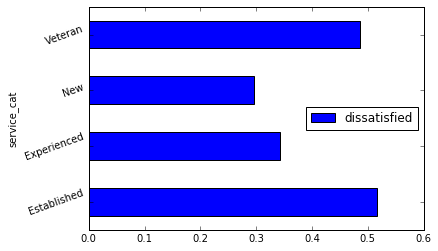

In [ ]:
# Calculate the percentage of employees who resigned due to dissatisfaction in each category
dis_pct = combined_updated.pivot_table(index='service_cat', values='dissatisfied')

# Plot the results
%matplotlib inline
dis_pct.plot(kind='barh', rot=20)

**Answer to our Question :**

The Plot above shows the result we can answer to our question, the employees who are resigning more are the ones that  are veterns , who have 7 or more years. The chain we can see here is that there is more dissatisfaction as time spent goes up.

Further analysis can be done to answer further questions which will be shown below. 

# Further Analysis 

# Dissatisfied by age
Below we will examine the age breakdown employees who resigned due to dissatisfaction. 
We will need to divice the certain age brackers into groups:

20s
30s
40s
50s
60+

In [ ]:
combined_updated['age'].value_counts(dropna=False)

51-55            71
NaN              55
41-45            48
41  45           45
46-50            42
36-40            41
46  50           39
26-30            35
21  25           33
31  35           32
36  40           32
26  30           32
56 or older      29
21-25            29
31-35            29
56-60            26
61 or older      23
20 or younger    10
Name: age, dtype: int64

In [ ]:
combined_updated['age'] = combined_updated['age'].astype('str')

In [ ]:
def age(s):
    if s[0] == '2':
        return '20s'
    elif s[0] == '3':
        return '30s'
    elif s[0] == '4':
        return '40s'
    elif s[0] == '5':
        return '50s'
    elif s[0] == '6':
        return '60s'
    elif s == 'nan':
        return np.nan

In [ ]:
combined_updated['age'] = combined_updated['age'].apply(age)

In [ ]:
combined_updated['age'].value_counts()

40s    174
20s    139
30s    134
50s    126
60s     23
Name: age, dtype: int64

In [ ]:
age_diss_count = pd.pivot_table(combined_updated, index='age', values='dissatisfied', aggfunc='sum')
age_diss_count = age_diss_count.sort_values(by=['dissatisfied'])
age_diss_count = age_diss_count.rename(columns={'dissatisfied': 'dissatisfied_count'})
age_diss_count

,dissatisfied_count
age,
60s,12.0
30s,48.0
20s,49.0
50s,51.0
40s,66.0


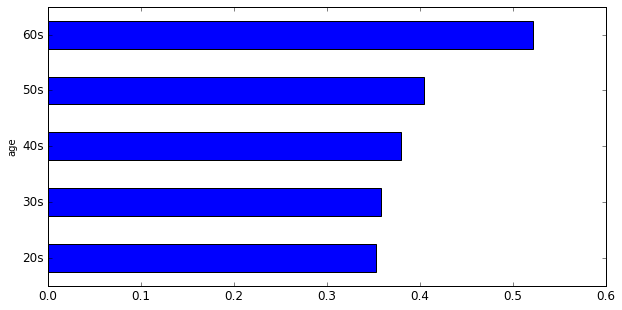

In [ ]:
age_perc = pd.pivot_table(combined_updated, index='age', values='dissatisfied')
age_perc = age_perc.sort_values(by=['dissatisfied'])
age_perc.plot(kind='barh', legend=False, figsize=(10,5), fontsize=12)

**Age Observation:**

In the graph above, we can see that as the age bracket gets higher the resignation due to dissatifaction increases. This may be due to the longetivity of being at the company and not being happy.

# Dissatisfaction by gender

Question: Examine the gender breakdown of employees who resigned due to dissatisfaction . 

We will look at both : Males and Females

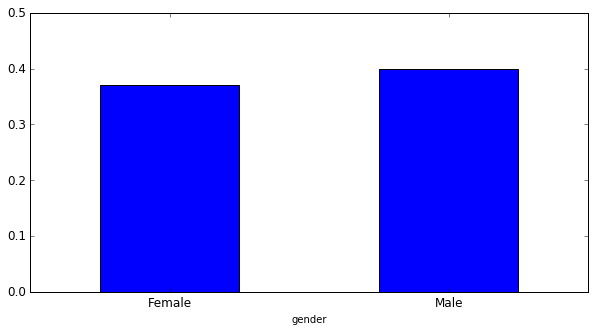

In [ ]:
by_gender = pd.pivot_table(combined_updated, index='gender', values='dissatisfied')
by_gender.plot(kind='bar', rot=360, figsize=(10,5), fontsize=12, ylim=[0, 0.5], legend=False)

In [ ]:
gender_diss_count = pd.pivot_table(combined_updated, index='gender', values='dissatisfied', aggfunc='sum')
gender_diss_count = gender_diss_count.sort_values(by=['dissatisfied'])
gender_diss_count = gender_diss_count.rename(columns={'dissatisfied': 'dissatisfied_count'})
gender_diss_count

,dissatisfied_count
gender,
Male,67.0
Female,157.0


**Gender Observation:**

In the graph and table above, we can see that there isnt a large diffrence between males and females, but males do hold a higher dissatisfied percent, and do hold a lesser count when comapred to females. Females have a higher count

# Dissatisfaction by Gender and Age

Questoin : Which combinatoin of gender and age holds the higher or lower resignation due to dissatisfaction?

In [ ]:
age_gender = pd.pivot_table(combined_updated, index=['gender', 'age'], values='dissatisfied')
age_gender

dissatisfied
gender age              
Female 20s      0.375000
       30s      0.336842
       40s      0.389313
       50s      0.375000
       60s      0.416667
Male   20s      0.285714
       30s      0.421053
       40s      0.357143
       50s      0.444444
       60s      0.750000

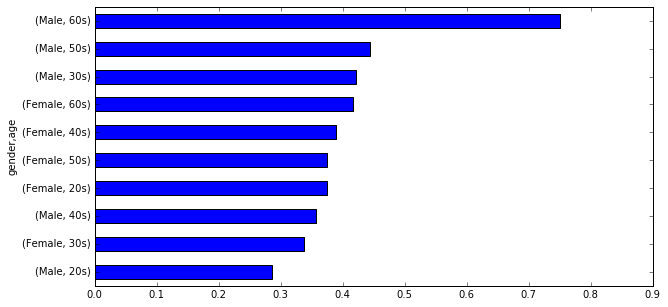

In [ ]:
age_gender = age_gender.sort_values(by=['dissatisfied'])
age_gender.plot(kind='barh', figsize=(10, 5), legend=False, xlim=[0, 0.90])

**Gender and Age Observation dissatisfaction:**

In the graph and table above, we can see that the most prominent resignation  due to dissatisfaction is in males in there 60's, in terms of female it is simmilar. THis further shows that the older you are regarldess of sex, dissatisfaction is higher. The low amount of dissatisfaction in young people could be due to them only being there for a short period of time. 

# Employment Dissatisfaction:

Questoin : Which employment type holds the higher resignation due to dissatisfaction and which has the lowest?

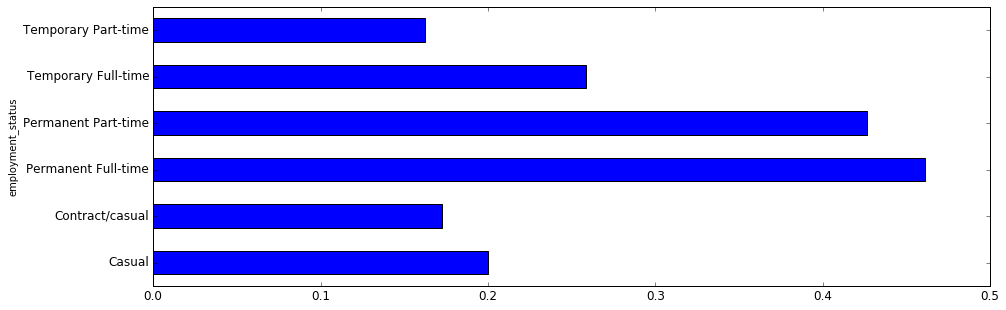

In [ ]:
by_employment = pd.pivot_table(combined_updated, index='employment_status', values='dissatisfied')
by_employment.plot(kind='barh', rot=360, figsize=(15,5), fontsize=12, ylim=[0, 0.6], legend=False)

In [ ]:
employment_diss_count = pd.pivot_table(combined_updated, index='employment_status', values='dissatisfied', aggfunc='sum')
employment_diss_count = employment_diss_count.sort_values(by=['dissatisfied'])
employment_diss_count = employment_diss_count.rename(columns={'dissatisfied': 'dissatisfied_count'})
employment_diss_count

,dissatisfied_count
employment_status,
Casual,1.0
Contract/casual,5.0
Temporary Part-time,6.0
Temporary Full-time,31.0
Permanent Part-time,64.0
Permanent Full-time,118.0


**Employment Observation dissatisfaction:**

In the graph and table above, we can see that dissatisfaction is seen most in Permanent positions, this makes sense espcially when relating to our past analysis that probably most of the "Permanent Full-time and part-time" are in the older age group who do experince more dissatisfaction as we see above. The lower here is the casual. We will dig deeper to confrim this "Employment and age breakdown".

# Dissatisfaction by Employment Status and Age

Questoin : Which combinatoin of employment and age holds the higher resignation due to dissatisfaction?

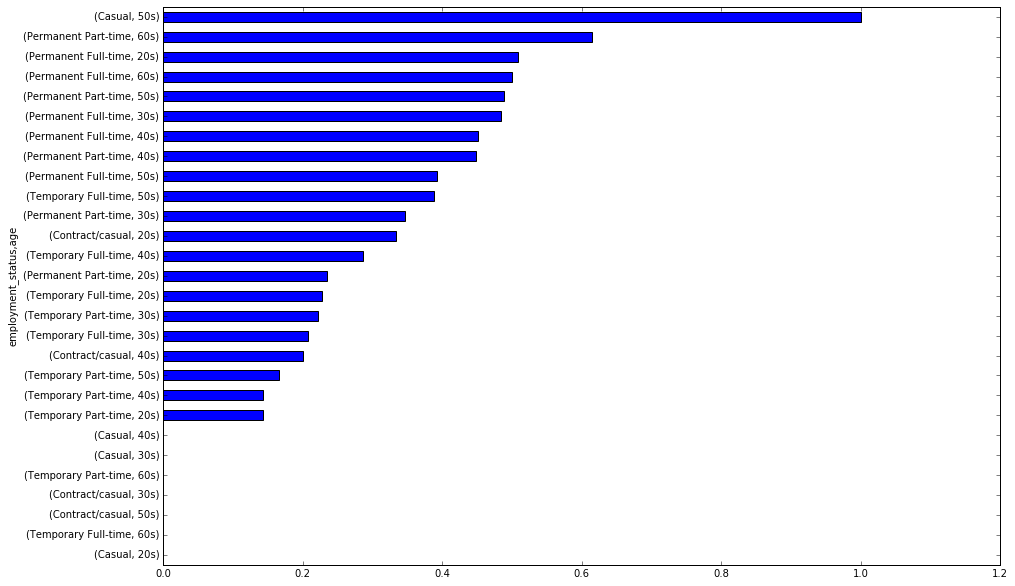

In [ ]:
status_age = pd.pivot_table(combined_updated, index=['employment_status', 'age'], values='dissatisfied')
status_age = status_age.sort_values(by=['dissatisfied'])
status_age.plot(kind='barh', figsize=(15, 10), legend=False, xlim=[0, 1.2])

**Employment and Age Observation dissatisfaction:**

In the graph and table above we can see that employees who resigned due to dissatisfaction was very high in Casual 50's. overall though, Full time and part time have a higher count and higher percentage.

# Dissatisfaction by Position

Questoin : Which position holds the higher resignation due to dissatisfaction?

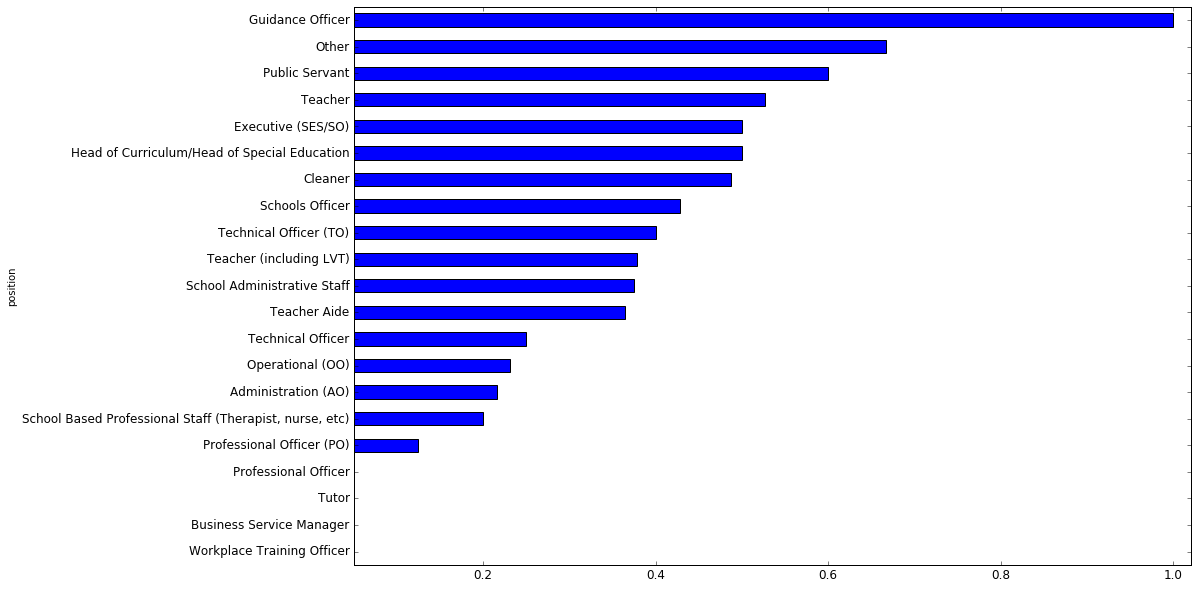

In [ ]:
dis_position = pd.pivot_table(combined_updated, index='position', values='dissatisfied')
dis_position = dis_position.sort_values(by=['dissatisfied'])
dis_position.plot(kind='barh', figsize=(15, 10), fontsize=12, legend=False, xlim=[0.05, 1.02])

In [ ]:
combined_updated['position'].value_counts(dropna=False)

Administration (AO)                                        148
Teacher                                                    129
Teacher (including LVT)                                     95
Teacher Aide                                                63
NaN                                                         53
Cleaner                                                     39
Public Servant                                              30
Professional Officer (PO)                                   16
Operational (OO)                                            13
Head of Curriculum/Head of Special Education                10
Technical Officer                                            8
School Administrative Staff                                  8
Schools Officer                                              7
Workplace Training Officer                                   6
School Based Professional Staff (Therapist, nurse, etc)      5
Technical Officer (TO)                                 

**Position Observation dissatisfaction:**

In the graph and table above, it is very alarming that we see a very high percent in Guidance Officer but as we see there is a low number in this position, this showed that 100% in this position left due to dissatisifcation. Teacher holds one of the higher counts, and had a high amount of resignation due to dissatisfaction.

# Dissatisfaction by Survey
Which Survey counted a higher amount of resignation due to dissatisfaction?

In [ ]:
institute_count = pd.pivot_table(combined_updated, index='institute', values='dissatisfied', aggfunc='sum')
institute_count = institute_count.rename(columns={'dissatisfied': 'dissatisfied_count'})
institute_count

,dissatisfied_count
institute,
DETE,149.0
TAFE,91.0


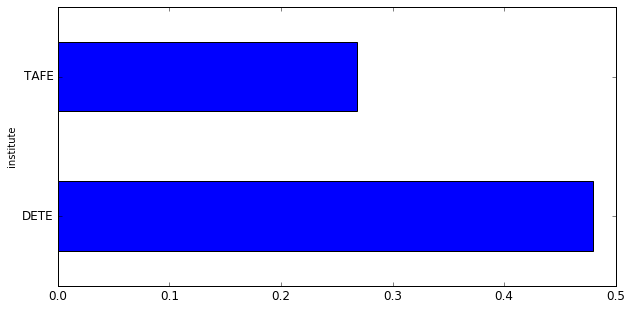

In [ ]:
by_perc = pd.pivot_table(combined_updated, index='institute', values='dissatisfied')
by_perc.plot(kind='barh', rot=360, figsize=(10,5), fontsize=12, legend=False)

**Suvery Observation dissatisfaction:**

In the graph and table above it seems that DETE employees have resigned due to job dissatisfaction more often than TAFE employees.

# Conclusion

In this project, we analyzed exit surveys from both TETE and DETE, our main focus were on emlpoyees who resigned due to dissatisfcation. A summary of our findings are below:

- When comparing Surveys,  DETE employees have resigned due to job dissatisfaction more often than TAFE employees

- Veteran Employees are resigning due to dissatisfcation more then others, while "new" were less often to 

- Male employees resigned more then female employees 

- Male employees in there 60's resigned due to dissatisfcation , while men in there 20's were least often

- In terms of position, Guidance Officer saw a 100% resignatoin due to dissatisfcation. 

- Permanent Full-time and Part time had the highest counts and percentage 

